## Titanic Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import acquire as aq

In [2]:
titanic_df = aq.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [4]:
titanic_df.age = titanic_df.age.fillna(0)
titanic_df.age = titanic_df.age.astype('int64')
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35,0,0,8.0500,S,Third,NaN,Southampton,1


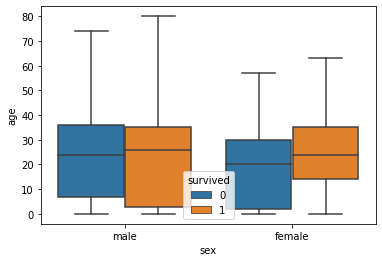

In [5]:
sns.boxplot(data=titanic_df, x='sex', y='age', hue='survived')
plt.show()

In [6]:
titanic_df.shape

(891, 13)

In [7]:
titanic_df = titanic_df.drop_duplicates()
titanic_df.shape

(891, 13)

In [8]:
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35,0,0,8.0500,S,Third,NaN,Southampton,1


In [9]:
titanic_df.parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

In [10]:
cols_to_drop = ['deck', 'embarked', 'class']
titanic_df = titanic_df.drop(columns=cols_to_drop)

In [11]:
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,22,1,0,7.2500,Southampton,0
1,1,1,1,female,38,1,0,71.2833,Cherbourg,0
2,2,1,3,female,26,0,0,7.9250,Southampton,1
3,3,1,1,female,35,1,0,53.1000,Southampton,0
4,4,0,3,male,35,0,0,8.0500,Southampton,1


In [12]:
dummy_df = pd.get_dummies(titanic_df[['sex','embark_town']], dummy_na=False)
dummy_df.head()

,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [13]:
titanic_df = pd.concat([titanic_df, dummy_df], axis=1)
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,22,1,0,7.2500,Southampton,0,0,1,0,0,1
1,1,1,1,female,38,1,0,71.2833,Cherbourg,0,1,0,1,0,0
2,2,1,3,female,26,0,0,7.9250,Southampton,1,1,0,0,0,1
3,3,1,1,female,35,1,0,53.1000,Southampton,0,1,0,0,0,1
4,4,0,3,male,35,0,0,8.0500,Southampton,1,0,1,0,0,1


In [14]:
train, test = train_test_split(titanic_df, test_size=.2, random_state=123, stratify=titanic_df.survived)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)

In [15]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (498, 10)
validate -> (214, 10)
test -> (179, 10)


In [16]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')